In [219]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# DOSYAMIZI OKUYALIM

In [220]:
train=pd.read_csv('./Train_Loan_Home.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [221]:
train_original = train.copy()

# Kolonlara bakalım

In [222]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [223]:
train.shape

(614, 13)

# ANALİZ

## Kredi Alma Durumu

In [224]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [225]:
train["Loan_Status"].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

## Cinsiyet Durumu

In [226]:
train['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [227]:
train['Gender'].value_counts(normalize=True)*100

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

## Evlilik Durumu

In [228]:
train['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [229]:
train['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

## Çocuk Durumu

In [230]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [231]:
train['Dependents'].value_counts(normalize=True)*100

Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64

## Eğitim Durmu

In [232]:
train["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [233]:
train["Education"].value_counts(normalize=True)*100

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

## Yaşadığı Bölge Türü

In [234]:
train["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [235]:
train['Property_Area'].value_counts(normalize=True)*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

## Gelir Dağılımı

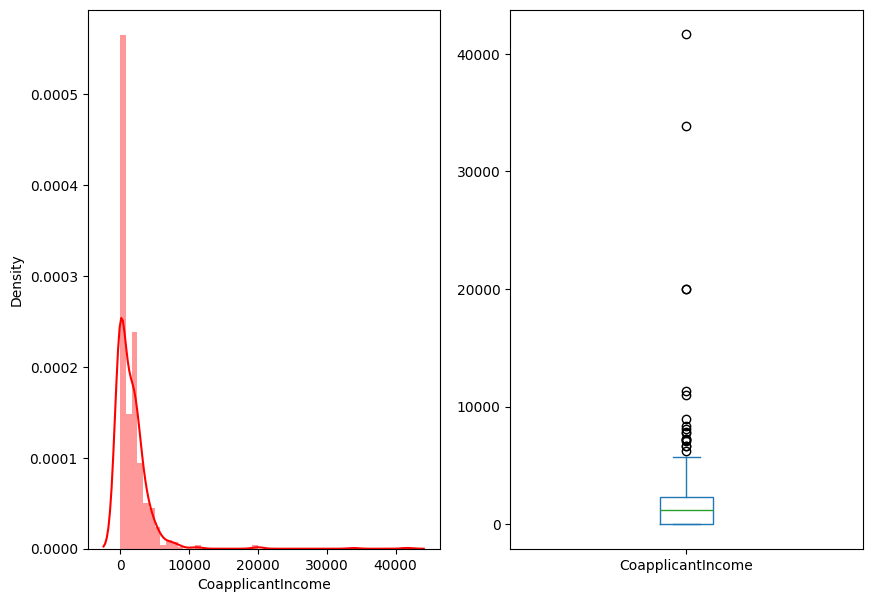

In [236]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'],color='red')
plt.subplot(1,2,2)
train['CoapplicantIncome'].plot.box(figsize=(10,7))
plt.show()

## Eğitim Durumuna Göre Onaylanma

In [237]:
pd.crosstab(train["Education"],train["Loan_Status"])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


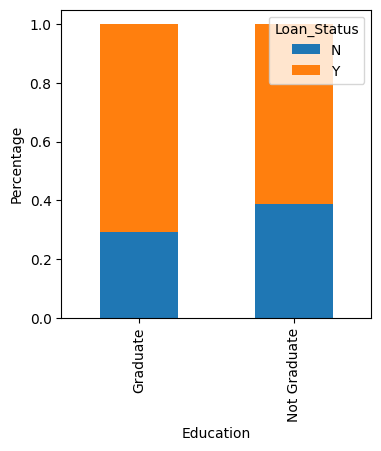

In [238]:
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

## Boş Değerlerin Tespiti

In [239]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Boş Verileri Ortalama Değerlere Göre Dolduralım

In [240]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)


In [241]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Test Verisini İnceleyelim   

In [242]:
test = pd.read_csv("Test_Loan_Home.csv")

In [243]:
test.isnull().sum()

Loan_ID                      0
Gender                      11
Married                      0
Dependents                  10
Education                    0
Self_Employed               23
ApplicantIncomeMonthly       0
CoapplicantIncomeMonthly     0
LoanAmountThousands          5
Loan_Amount_Term_Months      6
Credit_History              29
Property_Area                0
dtype: int64

In [244]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term_Months"].fillna(test["Loan_Amount_Term_Months"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmountThousands"].fillna(test["LoanAmountThousands"].median(),inplace=True)

In [245]:
test.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncomeMonthly      0
CoapplicantIncomeMonthly    0
LoanAmountThousands         0
Loan_Amount_Term_Months     0
Credit_History              0
Property_Area               0
dtype: int64

In [246]:
test = test.drop(["ApplicantIncomeMonthly","CoapplicantIncomeMonthly","LoanAmountThousands","Loan_Amount_Term_Months"],axis=1)

In [247]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)


In [248]:
y=train["Loan_Status"]
X=train.drop("Loan_Status",axis=1)

In [249]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)


In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [253]:
logistic_model = LogisticRegression(random_state=1)

In [254]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [255]:

pred_cv_logistic=logistic_model.predict(x_cv)

In [256]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [257]:
score_logistic


79.45945945945945

In [258]:
x_cv.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,11250,0.0,196.0,360.0,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False
544,3017,663.0,102.0,360.0,1.0,True,False,False,True,True,False,False,False,False,True,True,False,False,True,False
41,1800,1213.0,47.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
148,10000,1666.0,225.0,360.0,1.0,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
111,2929,2333.0,139.0,360.0,1.0,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False
